In [99]:
import numpy as np


def right_candidate(t0, period, true_t0, true_period, verbose=False):
    t0_check = (
        np.abs((t0 - true_t0 + 0.5 * true_period) % true_period - 0.5 * true_period)
        % period
        < 0.01
    )
    period_check = np.abs(period - true_period) <= 0.01
    alias_check = np.abs(2 * period - true_period) <= 0.01
    alias_check |= np.abs(period / 2 - true_period) <= 0.01
    if period_check:
        return 1
    elif alias_check:
        return 0.5
    else:
        return 0


In [101]:
import pickle
from glob import glob


def get_nuance_results(folder):
    files = glob(f"{folder}/data/153193474/recovered/nuance/*.params")

    data = []

    for f in files:
        recovered_period = pickle.load(open(f, "rb"))["period"]
        i = int(eval(f.split("/")[-1].split(".")[0]))
        injected = pickle.load(
            open(
                f"{folder}/data/153193474/injected/{i}.fluxes",
                "rb",
            )
        )
        injected_radius = injected["planet_radius"]
        injected_period = injected["planet_period"]
        data.append(
            [
                injected_radius,
                injected_period,
                right_candidate(0, recovered_period, 0, injected_period),
            ]
        )

    return np.array(data)


# Final plot

In [108]:
import pandas as pd

df = pd.read_csv("../data/153193474/recovered/nuance/results.csv")


In [112]:
def plot(filename, ax):
    df = pd.read_csv(filename)
    df["found"] = df.apply(
        lambda row: right_candidate(
            row["t0"], row["period"], row["true_t0"], row["true_period"]
        ),
        axis=1,
    )
    radius, period, found, tau, delta = df[
        ["radius", "true_period", "found", "tau", "delta"]
    ].values.T

    # setting up ranges
    taus_range = np.min(tau), np.max(tau)
    deltas_range = np.min(delta), np.max(delta)
    periods_range = np.min(period), np.max(period)
    radii_range = np.min(radius), np.max(radius)
    extent = (*periods_range, *radii_range)

    ax.imshow(
        found.reshape((10, 10)),
        extent=[*periods_range, *radii_range],
        aspect="auto",
        cmap="Greys_r",
        origin="lower",
    )

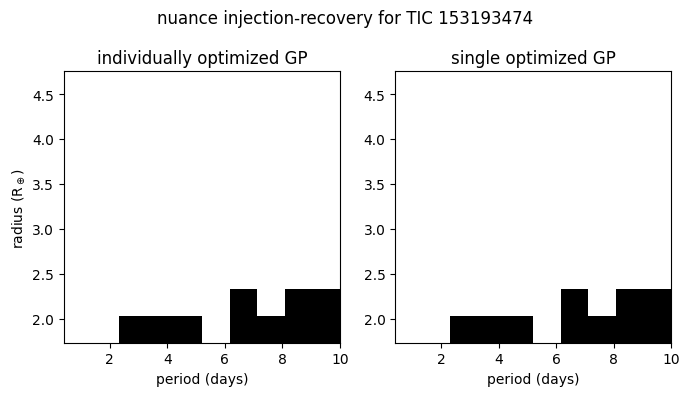

In [136]:
plt.figure(figsize=(7, 4))

ax = plt.subplot(121)
plot(
    "../../real_injection_recovery_gp_opt/data/153193474/recovered/nuance/results.csv",
    ax,
)
ax.set_title("individually optimized GP")
ax2 = plt.subplot(122)
plot("../../real_injection_recovery/data/153193474/recovered/nuance/results.csv", ax2)
ax2.set_title("single optimized GP")
ax2.set_xlabel("period (days)")
ax.set_ylabel("radius (R$_\oplus$)")
ax.set_xlabel("period (days)")
plt.suptitle("nuance injection-recovery for TIC 153193474")
plt.tight_layout()
# plt.savefig("../figures/TIC_153193474_consistency_check.pdf", dpi=300)


In [ ]:
ax = plt.subplot(121)

In [ ]:
rec = 